In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import time
import sklearn

sklearn.__version__

'1.2.1'

In [2]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

In [6]:
start_time = time.time()
df = pd.read_parquet(f"{SCRATCH_DIR}/predictive_features_18_19.parquet")
end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

df

Elapsed time: 9.4849 seconds


,Month,DayOfWeek,Reporting_Airline,Tail_Number,CRSDepTime,CRSArrTime,DistanceGroup,YEAR MFR,engine_manufacturer,engine_model,aircraft_manufacturer,aircraft_model,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE,delayed
17400315,1,3,B6,516JB,0700,0958,4,2000,IAE,V2500SERIES,AIRBUS INDUSTRIE,A320-232,39.871944,-75.240556,26.071667,-80.149722,False
17400316,1,3,B6,565JB,1127,1411,4,2003,IAE,V2500SERIES,AIRBUS,A320-232,26.071667,-80.149722,39.871944,-75.240556,True
17400317,1,3,B6,507JB,1311,1419,1,1979,LYCOMING,TI0-540 SER,PIPER,PA-23-250,33.818056,-118.151944,36.080000,-115.152222,False
17400320,1,3,B6,258JB,0920,1102,2,2006,GE,CF34-10E6,EMBRAER,ERJ 190-100 IGW,42.363056,-71.006389,38.851389,-77.037778,True
17400323,1,3,B6,594JB,1934,2225,5,2004,IAE,V2500SERIES,AIRBUS,A320-232,27.975556,-82.533333,42.363056,-71.006389,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32288695,12,7,DL,346DN,0600,0802,4,2018,CFM INTL,CFM56-5B3/3,AIRBUS,A321-211,33.636667,-84.427778,40.777222,-73.872500,False
32288696,12,7,DL,697DL,1209,1438,6,1999,P & W,PW2037,BOEING,757-232,28.429444,-81.308889,44.881944,-93.221667,True
32288697,12,7,DL,697DL,0650,1110,6,1999,P & W,PW2037,BOEING,757-232,44.881944,-93.221667,28.429444,-81.308889,True
32288698,12,7,DL,6714Q,1639,1932,8,2000,P & W,PW2037,BOEING,757-232,38.851389,-77.037778,40.788333,-111.977778,False


In [7]:
df.value_counts("Reporting_Airline")

Reporting_Airline
WN    2749229
DL    1961132
AA    1864664
OO    1584660
UA    1261743
YX     628362
MQ     598628
B6     598620
OH     546847
AS     510897
9E     492197
YV     434189
NK     380198
EV     324241
F9     263570
G4     202712
HA     159655
VX      17294
Name: count, dtype: int64

In [25]:
united_df = df[df["Reporting_Airline"].eq("UA")].drop("Reporting_Airline", axis=1)

# 1261743 rows × 17 columns
united_df

,Month,DayOfWeek,Tail_Number,CRSDepTime,CRSArrTime,DistanceGroup,YEAR MFR,engine_manufacturer,engine_model,aircraft_manufacturer,aircraft_model,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE,delayed
17429196,1,3,37465,1316,1459,2,2013,CFM INTL,CFM56-7B26E,BOEING,737-924ER,36.080000,-115.152222,37.618889,-122.375556,False
17429197,1,3,35260,1335,1649,4,2001,CFM INTL.,CFM56 SERIES,BOEING,737-824,33.675556,-117.868333,39.861667,-104.673056,False
17429198,1,3,37290,1618,1828,5,2004,CFM INTL.,CFM56 SERIES,BOEING,737-824,26.536111,-81.755278,41.976944,-87.908056,False
17429199,1,3,841UA,1400,1536,2,2001,IAE,V2500SERIES,AIRBUS INDUSTRIE,A319-131,41.976944,-87.908056,36.124444,-86.678056,False
17429200,1,3,37468,2103,0011,3,2013,CFM INTL,CFM56-7B27E,BOEING,737-924ER,41.976944,-87.908056,40.777222,-73.872500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219998,12,6,495UA,0634,0956,4,2002,IAE,V2500SERIES,AIRBUS,A320-232,38.695556,-121.590833,39.861667,-104.673056,True
32219999,12,6,810UA,0900,1055,4,1998,IAE,V2500SERIES,AIRBUS INDUSTRIE,A319-131,39.048889,-84.667778,29.984444,-95.341389,False
32220000,12,6,75435,1715,1905,4,2009,CFM INTL,CFM56-7B26/3,BOEING,737-924ER,39.861667,-104.673056,37.618889,-122.375556,True
32220001,12,6,811UA,1702,1845,2,1998,IAE,V2500SERIES,AIRBUS INDUSTRIE,A319-131,32.733611,-117.189722,37.618889,-122.375556,False


In [27]:
united_df["delayed"].value_counts(normalize=True)

delayed
False    0.765278
True     0.234722
Name: proportion, dtype: float64

In [10]:
num_cols = [
    "CRSDepTime",
    "CRSArrTime",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "Month",
    "DayOfWeek",
    # "Reporting_Airline",
    "Tail_Number",
    "DistanceGroup",
    "YEAR MFR",
    "engine_manufacturer",
    "engine_model",
    "aircraft_manufacturer",
    "aircraft_model",
]

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


start_time = time.time()

X = df.drop("delayed", axis=1)
y = df["delayed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(), cat_cols),
    ]
)

X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

Elapsed time: 59.2383 seconds


In [12]:
from sklearn.model_selection import train_test_split

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 8.9992 seconds


In [13]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

logistic_regression = LogisticRegression(solver="saga", max_iter=1000)
logistic_regression.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 9519.7170 seconds


In [14]:
import pickle


with open(f"{SCRATCH_DIR}/07_logistic_regression_predictive_features_18_19_UA.pkl", "wb") as f:
    pickle.dump(logistic_regression, f)
    

In [21]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

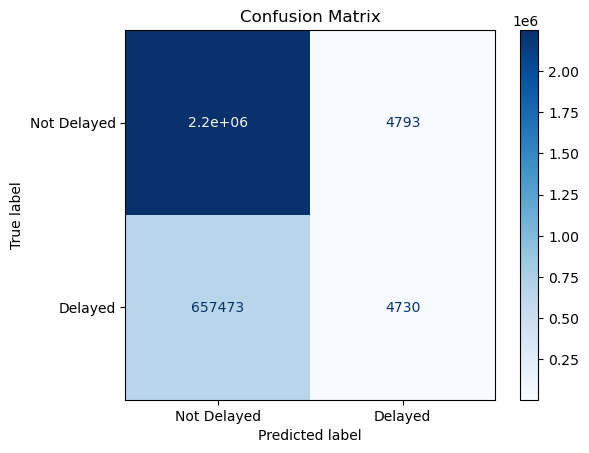

In [16]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"]
).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

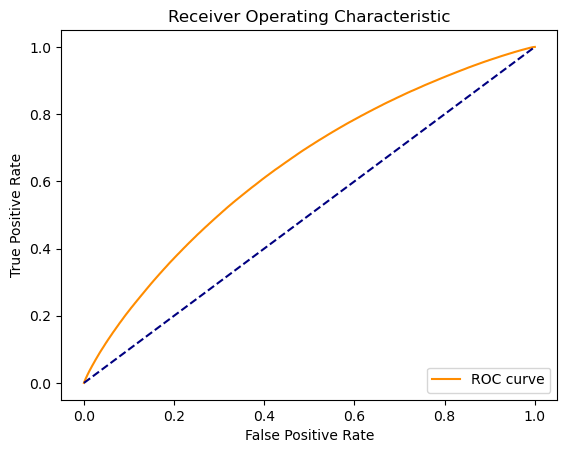

In [17]:
fpr, tpr, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

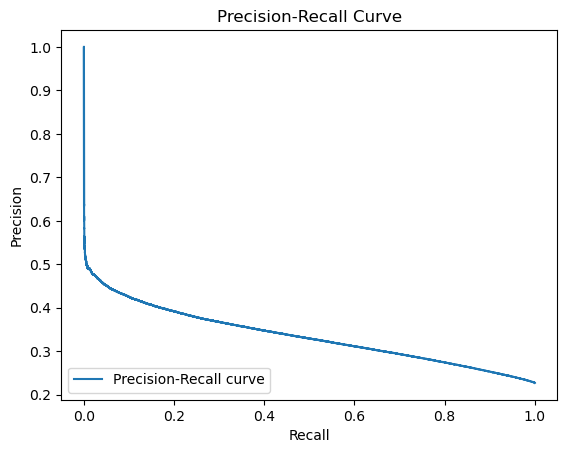

In [18]:
precision, recall, _ = precision_recall_curve(
    y_test, logistic_regression.predict_proba(X_test)[:, 1]
)

plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [22]:
import plotly.express as px

metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}
df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

fig = px.bar(
    df_metrics,
    x="Score",
    y="Metric",
    orientation="h",
    color="Metric",
    text="Score",
    title="Evaluation Metrics",
)

fig.update_layout(showlegend=False)

fig.show()